In [1]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [18]:
LA = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guatemala', 'Guiana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Panama', 'Peru', 'Puerto Rico', 'Dominican Republic', 'Surinam', 'Uruguay', 'Venezuela']

## Number of films 

In [2]:
%cypher MATCH (n:film) RETURN count(n) as Films

1 rows affected.


Films
614


## Number of LatinAmerican Films

In [23]:
lafilms = %cypher MATCH (n:film) WITH n match (n)-[:IS_FROM]-(c:country) WHERE c.name in {LA} RETURN c.name as Country, count(n) as Number_Films order by Number_Films desc
lafilms = lafilms.get_dataframe()
lafilms['Number_Films'].sum()

14 rows affected.


227

## Number of countries

In [3]:
%cypher MATCH (n:country) RETURN count(n) as Countries

1 rows affected.


Countries
89


## Number of LA countries

In [25]:
lafilms['Country'].count()

14

## Number of filmmakers

In [4]:
%cypher MATCH (n:director) RETURN count(n) as Filmmakers

1 rows affected.


Filmmakers
500


## Number of filmmakers in LA

In [26]:
%cypher MATCH (d:director)-[]-(n:film)-[:IS_FROM]-(c:country) WHERE c.name in {LA} with d RETURN count(d)

1 rows affected.


count(d)
284


## Top countries

In [6]:
%%cypher
match  (n:country)-[r :IS_FROM]-() with n, count(r) as deg order by deg desc limit 20 return n.name as Country, deg as Number_Films

20 rows affected.


Country,Number_Films
Argentina,79
China,57
Brazil,43
Iran,38
Mexico,34
Philippines,31
Turkey,23
Indonesia,23
India,22
Chile,21


## LA countries

In [27]:
lafilms

,Country,Number_Films
0,Argentina,79
1,Brazil,43
2,Mexico,34
3,Chile,21
4,Colombia,11
5,Peru,8
6,Uruguay,8
7,Paraguay,8
8,Cuba,4
9,Ecuador,3


## Top directores 

In [28]:
%%cypher 
match  (n:director)-[r :DIRECTED]-() with n, count(r) as deg order by deg desc limit 20 return n.name as Filmmaker, deg as Number_Films

20 rows affected.


Filmmaker,Number_Films
Teguia Tariq,6
De La Cruz Khavn,5
Diaz Lav,5
Torres John,4
Encina Paz,4
Shirvani Mohammad,4
Woo Ming Jin,4
Wang Bing,4
Murga Celina,4
Martin Raya,4


## Top LA filmmakers

In [33]:
%%cypher 
match  (n:director)-[r :DIRECTED]-(f:film)-[:IS_FROM]-(c:country) where c.name in {LA} with n, count(r) as deg order by deg desc limit 20 return n.name as Filmmaker, deg as Number_Films

20 rows affected.


Filmmaker,Number_Films
Torres Leiva José Luis,7
Murga Celina,6
Dos Santos Alexis,5
Guzmán Laura Amelia,5
Mumenthaler Milagros,5
Moreno Rodrigo,5
Cárdenas Israel,5
Marins Jr Helvécio,5
Court Théo,5
Campolina Clarissa,4


## Number of grants

In [39]:
total = %cypher match  (n:grant)-[r:FUNDED_BY]-() with n, count(r) as deg order by deg desc limit 20 return n.name as Grant, deg as Number_Films
total = total.get_dataframe()
total = total.set_index('Grant')

la = %cypher match  (n:grant)-[r:FUNDED_BY]-(f:film)-[:IS_FROM]-(c:country) where c.name in {LA} with n, count(r) as deg order by deg desc limit 20 return n.name as Grant, deg as Number_LA_Films
la = la.get_dataframe()
la = la.set_index('Grant')

result = pd.concat([total, la], axis=1)
result.sort_values('Number_Films', ascending=False).reset_index()

7 rows affected.
7 rows affected.


,index,Number_Films,Number_LA_Films
0,Script and Project Development Support,401,160
1,Post-production support,183,74
2,Production support,43,15
3,Script and Project Development Support: Bright...,17,6
4,NFF+HBF Co-development Scheme,12,5
5,Script and Project Development Support: Voices,7,5
6,Post Production Funding,3,3


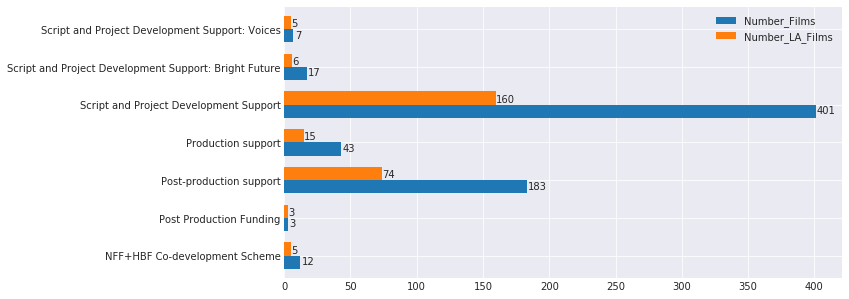

In [80]:
ax = result.plot(kind='barh', figsize=(10, 5),  width=0.7)
for y, x in enumerate(result['Number_Films']):
    plt.annotate(str(x), xy=(x + 1, y - 0.15), va='center')
    
for y, x in enumerate(result['Number_LA_Films']):
    plt.annotate(str(x), xy=(x, y + 0.15), va='center')    

In [83]:
films =  %cypher match (n:film) return distinct n.fid as Id, n.name as Title, n.year as Year
films = films.get_dataframe()

lafilms =  %cypher match (n:film)-[:IS_FROM]-(c:country) where c.name in {LA} return distinct n.fid as Id, n.name as Title, n.year as Year 
lafilms = lafilms.get_dataframe()

614 rows affected.
207 rows affected.


## Films by year

In [84]:
df_year = films.groupby('Year', sort=False).agg({'Id':'count'})
df_year.columns = ['Number of films']

df_yearla= lafilms.groupby('Year', sort=False).agg({'Id':'count'})
df_yearla.columns = ['Number of LA films']

result = pd.concat([df_year, df_yearla], axis=1)
result.sort_values(by='Number of films', ascending=False)


,Number of films,Number of LA films
2005,61,18
2004,50,11
2007,49,13
2009,47,14
2006,44,12
2010,44,19
2002,43,17
2003,43,15
2008,43,11
2011,41,19


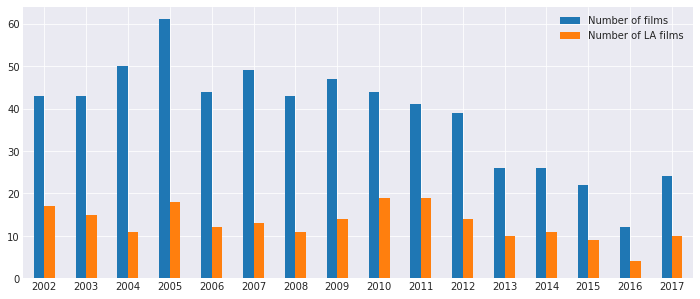

In [85]:
result = result.sort_index()
result.plot(rot = 0, kind='bar', figsize=(12,5))